In [2]:
import pandas as pd
import pandas_ta as ta
import json
from Backtest import Backtest

In [3]:
candles = json.loads(open("./dataset15M.json").read())
df = pd.DataFrame([c[1:] for c in candles[:-1]], index=[i for i in range(len(candles)-1)], columns=["open", "high", "low", "close", "volume"])
df["RSI"] = df.ta.rsi()
df["EMA100"] = df.ta.ema(100)
df["EMA150"] = df.ta.ema(150)
df["EMA300"] = df.ta.ema(300)
df = df.dropna().reset_index()

Taux de reussite => 47.94%


<AxesSubplot:>

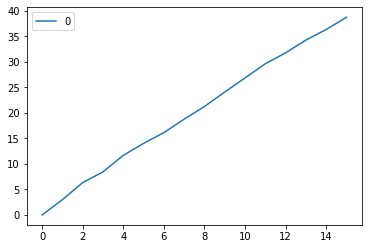

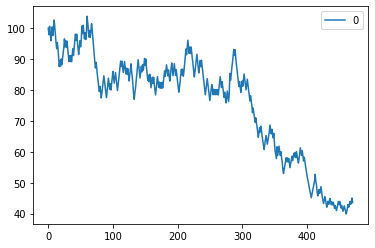

In [36]:
def short(candle):
    i = candle.index[0]
    if df["EMA300"][i] > df["EMA150"][i] > df["EMA100"][i]:
        return True
    return False
back = Backtest(100, df, 2, 0.01, 0.01)
result = back.backtest_short(short)
print("Taux de reussite => {}%".format(round((sum(result["win_rate"]) / len(result["win_rate"]))*100,2)))
pd.DataFrame(result["saved"]).plot()
pd.DataFrame(result["wallet"]).plot()

<AxesSubplot:>

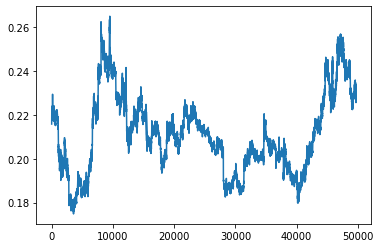

In [20]:
df["close"].plot()

In [24]:
df.ta.macd().dropna()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
33,0.000981,0.000030,0.000951
34,0.000936,-0.000012,0.000948
35,0.000873,-0.000060,0.000933
36,0.000766,-0.000133,0.000899
37,0.000698,-0.000161,0.000859
...,...,...,...
49695,-0.000509,0.000047,-0.000556
49696,-0.000601,-0.000036,-0.000565
49697,-0.000594,-0.000023,-0.000571
49698,-0.000431,0.000112,-0.000543
